# COGS 118A - Final Project

# Image Segmentation using UNet Model Variations

## Group members

- Yash Potdar
- Maitrayee Keskar
- Gauri Samith
- Kyra Hulse

# Abstract 
In this project, our goal is to accurately classify and segment objects within an image. This is a common problem in computer vision, as self-driving cars need to segment objects in their visual field in order to drive, or in AR surgery, where cameras must identify and classify organs. We will be using Microsoft’s Common Objects in Context (COCO) dataset, which contains around 330,000 images with 91 objects commonly seen in everyday life. We will be implementing image segmentation using a region-based CNN (R-CNN). The R-CNN algorithm generates various region proposals, computes features, and subsequently classifies regions. In order to measure success, we will use the Jaccard Index, also known as the Intersection over Union (IoU) metric, which compares the ratio of the intersection area and union area between the targeted and predicted segmentation. We aim to use the pre-trained Mask R-CNN as a baseline model and will gauge our model’s performance by comparing their evaluation metrics to the baseline.


# Background

Object classification is very important for many everyday tasks, such as self driving, and AR surgery improvements. Previous work has had great accuracy classifying images, however, these are often iconic images, in the same orientation, with little background distractions <a name="lin"></a>[<sup>[1]</sup>](#lin). Additionally, great work has been done creating bounding boxes around objects, however, segmentation is much more useful than bounding boxes, as it shows exactly where in the image the object is, rather than just the general area <a name="lin"></a>[<sup>[1]</sup>](#lin). 

Some of the models for Instance segmentation include U-Net, Mask R-CNN, FastFCN, Gated-SCNN, DeepLab, etc. These models are built for different use cases. The U-Net model upon visualization, looks like the letter U <a name="mwiti"></a>[<sup>[2]</sup>](#mwiti). The left part of the architecture is the contractive part to capture context and the right part is called the expansive part for better localization <a name="mwiti"></a>[<sup>[2]</sup>](#mwiti). The Mask R-CNN model is trained on the COCO dataset and the model classifies every pixel into a particular class <a name="mwiti"></a>[<sup>[2]</sup>](#mwiti). Every region of interest gets a segmentation mask <a name="mwiti"></a>[<sup>[2]</sup>](#mwiti). 

There has been a lot of research involving the development of new techniques for the task of image segmentation. Some of these works include OCR (Object-Contextual Representations), FCN, etc. In the case of OCR, the task is divided into three parts where the image is first coarsely divided into the object classes using ResNet or HRNet <a name="yuan"></a>[<sup>[3]</sup>](#yuan). After that, the representation for each object is estimated by aggregating the representations of the pixels in the corresponding object regions <a name="yuan"></a>[<sup>[3]</sup>](#yuan). This is followed by the augmentation of the pixels with OCR <a name="yuan"></a>[<sup>[3]</sup>](#yuan).  

In terms of identifying objects and placing bounding boxes around them, there have been models like CornerNet and CenterNet. The CornerNet model predicts two corners (top left and bottom right) of the object and then uses them to place bounding boxes around the object in the image <a name="law"></a>[<sup>[3]</sup>](#law). The CenterNet model detects the centers of the objects and then regresses to the object key points, if any <a name="zhou"></a>[<sup>[5]</sup>](#zhou). It predicts an offset for the center of the object to better capture it and then also predicts the width and height of the bounding box for the object <a name="zhou"></a>[<sup>[5]</sup>](#zhou). Using these predictions, the model forms the bounding boxes around the detected object <a name="zhou"></a>[<sup>[5]</sup>](#zhou).

# Problem Statement

There are many situations where machines need to identify different objects in a scene. For example, self-driving cars need to identify street signs and pedestrians, while AR surgery cameras need to identify nerves and organs. Therefore, we need machines to identify each object with a definable boundary (“things” as opposed to “stuff” with ambiguous boundaries such as the sky or ground), classify each object category, and segment each instance of each object (or determine which pixels are part of each object). This task is quantifiable - we have a classification and boundary detection task - measurable - accuracy in both classification and segmentation - and replicable - any scene in everyday life has objects that can be identified and their boundaries determined.

We'll be honing in on object categories that are most relevant for autonomous driving. From the 91 object labels, we will reduce these to labels that are relevant to driving. During EDA, we will plot the distribution of occurrences for each object category and use these results to further reduce this to include the top categories. The dataset would be large enough to use validation sets to determine the hyperparameters within a model and test sets to compare models.

# Data

We will be utilizing [Microsoft’s Common Objects in Context (COCO)](https://cocodataset.org/#overview) dataset to accomplish this image segmentation and classification task <a name="coco"></a>[<sup>[6]</sup>](#coconote). We selected this dataset because it is a large-scale dataset that is used in computer vision applications and can be used to determine which models can best classify and segment objects. This dataset also contains objects in context. For example, these images are more realistic and less lab-controlled because they are taken in a natural setting, where there are generally multiple types of objects in a single image. For example, in [image 423349](https://cocodataset.org/#explore?id=423349) in COCO, there are people, a large clock, and a stop sign.

The dataset contains 91 common object labels, such as ‘person’, ‘car’, ‘traffic light’, ‘cow’, and ‘bottle’. In the dataset, there are around 330,000 images with 2.5 million labeled objects. In our segmentation task, we aim to determine the objects within the image and create a boundary for that object within the image. Therefore, each image we test on will likely have multiple objects being classified.

One concern we must address is the unbalanced classes. As seen in this [tutorial](https://blog.roboflow.com/coco-dataset/)<a name="solawetz"></a>[<sup>[7]</sup>](#solawetznote) about COCO, there are some overrepresented classes such as “person”, “car”, and “chair”, while there are several underrepresented classes like “cat”, “laptop”, and “refrigerator”. Although the classifier may work well when identifying the overrepresented or aptly represented objects, the data imbalance could lead to issues when segmenting and classifying the underrepresented objects. We will need to specially handle this data by undersampling the majority class or oversampling the minority class. 

# Proposed Solution

For the purpose of solving an image classification and detection task, machine learning and deep learning algorithms are a very common route. Given that we require the machine to clearly set a boundary and identify the class/category of the object, supervised learning lets the model know the correct classes and their associated feature distributions in advance. Convolutional Neural Networks (CNNs) are a useful approach as they take in input images, assign importance (as learn weights and biases) to different objects in the image and differentiate between different images based on feature distributions for each class of objects. 


Unlike classification, object detection presents a variable output layer based on the number of occurrences of the objects of interest in the input. The model would need to sweep different regions of different sizes in the image in order to detect and draw bounding boxes around the required objects. We plan to use a Region-based CNN (R-CNN) which generates a few thousand region proposals using the Selective Search Algorithm. These regions are combined together in a matrix, fed into a CNN to extract features, and then passed on to an SVM which classifies the objects. 


There were several implementations of the R-CNN that are available to test out including but not limited to Mask R-CNN, FRCNN, etc. We are choosing to begin with a pre-trained Mask R-CNN, which was trained on the COCO dataset. Apart from just a bounding box, the model creates an additional mask around the detected object in order to increase classification accuracy by segmentation. This gives us an opportunity to explore the dataset and perform a sanity check as well. 

For our benchmark, we plan to use a regular UNet model. UNET is a U-shaped encoder-decoder network architecture, which consists of four encoder blocks and four decoder blocks that are connected via a bridge. The encoder network (contracting path) half the spatial dimensions and double the number of filters (feature channels) at each encoder block. Given that it is usually used for biomedical tasks, we feel as though this will offer an extremely robust and precise prediction approach. Once we evaluate this benchmark, we plan to perform certain architectural changes to explore whether we can improve its accuracy on the dataset. This can be done in the following ways:

* Add to model depth (additional layers)
* Add to model width
* Perform additional feature engineering/extract a different kind of feature
* Choose a different model (e.g Fast FCN) and compare performance


# Evaluation Metrics

For the task of Image Segmentation, some of the evaluation metrics commonly used are the Pixel accuracy metric, the Intersection over Union (IoU), and the Dice Co-efficient(F1-Score). The Pixel accuracy metric calculates the percentage of correctly classified pixels in the image. The problem with this metric is that when there is a class imbalance in the image, the metric gives a high accuracy, but in reality, the segmentation may have failed to cover some of the important classes. 

To make this more robust, the Intersection over Union metric which divides the area of overlap between the target and the predicted segmentation by the area of union of the target and predicted segmentation can be used. This makes the metric more robust against class imbalance. If the predicted segmentation covers the target segmentation but is bigger than the target area, then, the accuracy will be penalized by the denominator. The metric will give a high accuracy when the predicted segment is comparable in size with the target segment and also overlaps considerably with the target segment. This metric is also often used in literature. 

In our evaluation, we have used the Pixel accuracy metric, but there is scope for future improvement using the Intersection over Union method.

# Results

We have worked on 4 different models, and variations of the UNet architecture. Our baseline model is the original UNet model where no changes were made to the architecture. Following this, we tuned our model by making changes to the architecture and produced different variations as mentioned in the proposed solution. We then compared these models using the specified evaluation metrics.


### Baseline

__Test Accuracy__: 87.26% 

__Loss__: 0.2458

__Architecture__:

<code> 
    
    def down_block(
        input_tensor,
        no_filters,
        kernel_size=(3, 3),
        strides=(1, 1),
        padding="same",
        kernel_initializer="he_normal",
        max_pool_window=(2, 2),
        max_pool_stride=(2, 2)
    ):
        conv = Conv2D(
            filters=no_filters,
            kernel_size=kernel_size,
            strides=strides,
            activation=None,
            padding=padding,
            kernel_initializer=kernel_initializer
        )(input_tensor)

        conv = BatchNormalization(scale=True)(conv)

        conv = Activation("relu")(conv)

        conv = Conv2D(
            filters=no_filters,
            kernel_size=kernel_size,
            strides=strides,
            activation=None,
            padding=padding,
            kernel_initializer=kernel_initializer
        )(conv)

        conv = BatchNormalization(scale=True)(conv)

        # conv for skip connection
        conv = Activation("relu")(conv)

        pool = MaxPooling2D(pool_size=max_pool_window, strides=max_pool_stride)(conv)

        return conv, pool
    
    def bottle_neck(
        input_tensor,
        no_filters,
        kernel_size=(3, 3),
        strides=(1, 1),
        padding="same",
        kernel_initializer="he_normal"
    ):
        conv = Conv2D(
            filters=no_filters,
            kernel_size=kernel_size,
            strides=strides,
            activation=None,
            padding=padding,
            kernel_initializer=kernel_initializer
        )(input_tensor)

        conv = BatchNormalization(scale=True)(conv)

        conv = Activation("relu")(conv)

        conv = Conv2D(
            filters=no_filters,
            kernel_size=kernel_size,
            strides=strides,
            activation=None,
            padding=padding,
            kernel_initializer=kernel_initializer
        )(conv)

        conv = BatchNormalization(scale=True)(conv)

        conv = Activation("relu")(conv)

        return conv
    
    def up_block(    
        input_tensor,
        no_filters,
        skip_connection, 
        kernel_size=(3, 3),
        strides=(1, 1),
        upsampling_factor = (2,2),
        max_pool_window = (2,2),
        padding="same",
        kernel_initializer="he_normal"):


        conv = Conv2D(
            filters = no_filters,
            kernel_size= max_pool_window,
            strides = strides,
            activation = None,
            padding = padding,
            kernel_initializer=kernel_initializer
        )(UpSampling2D(size = upsampling_factor)(input_tensor))

        conv = BatchNormalization(scale=True)(conv)

        conv = Activation("relu")(conv) 


        conv = concatenate( [skip_connection , conv]  , axis = -1)


        conv = Conv2D(
            filters=no_filters,
            kernel_size=kernel_size,
            strides=strides,
            activation=None,
            padding=padding,
            kernel_initializer=kernel_initializer
        )(conv)

        conv = BatchNormalization(scale=True)(conv)

        conv = Activation("relu")(conv)

        conv = Conv2D(
            filters=no_filters,
            kernel_size=kernel_size,
            strides=strides,
            activation=None,
            padding=padding,
            kernel_initializer=kernel_initializer
        )(conv)

        conv = BatchNormalization(scale=True)(conv)

        conv = Activation("relu")(conv)

        return conv
    
    def output_block(input_tensor,
        padding="same",
        kernel_initializer="he_normal"
    ):

        conv = Conv2D(
            filters=2,
            kernel_size=(3,3),
            strides=(1,1),
            activation="relu",
            padding=padding,
            kernel_initializer=kernel_initializer
        )(input_tensor)


        conv = Conv2D(
            filters=1,
            kernel_size=(1,1),
            strides=(1,1),
            activation="sigmoid",
            padding=padding,
            kernel_initializer=kernel_initializer
        )(conv)
    
        return conv
    
    def UNet(input_shape = (128,128,3)):
    
        filter_size = [64,128,256,512,1024]

        inputs = Input(shape = input_shape)

        d1 , p1 = down_block(input_tensor= inputs,
                             no_filters=filter_size[0],
                             kernel_size = (3,3),
                             strides=(1,1),
                             padding="same",
                             kernel_initializer="he_normal",
                             max_pool_window=(2,2),
                             max_pool_stride=(2,2))


        d2 , p2 = down_block(input_tensor= p1,
                             no_filters=filter_size[1],
                             kernel_size = (3,3),
                             strides=(1,1),
                             padding="same",
                             kernel_initializer="he_normal",
                             max_pool_window=(2,2),
                             max_pool_stride=(2,2))



        d3 , p3 = down_block(input_tensor= p2,
                             no_filters=filter_size[2],
                             kernel_size = (3,3),
                             strides=(1,1),
                             padding="same",
                             kernel_initializer="he_normal",
                             max_pool_window=(2,2),
                             max_pool_stride=(2,2))



        d4 , p4 = down_block(input_tensor= p3,
                             no_filters=filter_size[3],
                             kernel_size = (3,3),
                             strides=(1,1),
                             padding="same",
                             kernel_initializer="he_normal",
                             max_pool_window=(2,2),
                             max_pool_stride=(2,2))


        b = bottle_neck(input_tensor= p4,
                             no_filters=filter_size[4],
                             kernel_size = (3,3),
                             strides=(1,1),
                             padding="same",
                             kernel_initializer="he_normal")



        u4 = up_block(input_tensor = b,
                      no_filters = filter_size[3],
                      skip_connection = d4,
                      kernel_size=(3, 3),
                      strides=(1, 1),
                      upsampling_factor = (2,2),
                      max_pool_window = (2,2),
                      padding="same",
                      kernel_initializer="he_normal")

        u3 = up_block(input_tensor = u4,
                      no_filters = filter_size[2],
                      skip_connection = d3,
                      kernel_size=(3, 3),
                      strides=(1, 1),
                      upsampling_factor = (2,2),
                      max_pool_window = (2,2),
                      padding="same",
                      kernel_initializer="he_normal")


        u2 = up_block(input_tensor = u3,
                      no_filters = filter_size[1],
                      skip_connection = d2,
                      kernel_size=(3, 3),
                      strides=(1, 1),
                      upsampling_factor = (2,2),
                      max_pool_window = (2,2),
                      padding="same",
                      kernel_initializer="he_normal")


        u1 = up_block(input_tensor = u2,
                      no_filters = filter_size[0],
                      skip_connection = d1,
                      kernel_size=(3, 3),
                      strides=(1, 1),
                      upsampling_factor = (2,2),
                      max_pool_window = (2,2),
                      padding="same",
                      kernel_initializer="he_normal")



        output = output_block(input_tensor=u1 , 
                             padding = "same",
                             kernel_initializer= "he_normal")

        model = Model(inputs = inputs , outputs = output)


        return model
</code>


### Model Variation 1: Changes to Output Block and Smaller Filter SIzes


__Test Accuracy__: 80.04%

__Loss__: 0.6772

__Architecture__:

The downblock, upblock and bottleneck sections remain the same.

Output Block: One additional convolutional layer

UNet Structure: Remains the same. However, filter sizes were reduced by a factor of 2.

The below code displays the sections of the architecture where changes were made:

<code> 
    
    def output_block(input_tensor,
        padding="same",
        kernel_initializer="he_normal"
    ):

        conv = Conv2D(
            filters=2,
            kernel_size=(3,3),
            strides=(1,1),
            activation="relu",
            padding=padding,
            kernel_initializer=kernel_initializer
        )(input_tensor)


        conv = Conv2D(
            filters=1,
            kernel_size=(1,1),
            strides=(1,1),
            activation="relu",
            padding=padding,
            kernel_initializer=kernel_initializer
        )(conv)

        conv = Conv2D(
            filters=1,
            kernel_size=(1,1),
            strides=(1,1),
            activation="sigmoid",
            padding=padding,
            kernel_initializer=kernel_initializer
        )(conv)


        return conv
    
    def UNet(input_shape = (128,128,3)):
    
        filter_size = [32,64,128,256,512]

        inputs = Input(shape = input_shape)

        d1 , p1 = down_block(input_tensor= inputs,
                             no_filters=filter_size[0],
                             kernel_size = (3,3),
                             strides=(1,1),
                             padding="same",
                             kernel_initializer="he_normal",
                             max_pool_window=(2,2),
                             max_pool_stride=(2,2))


        d2 , p2 = down_block(input_tensor= p1,
                             no_filters=filter_size[1],
                             kernel_size = (3,3),
                             strides=(1,1),
                             padding="same",
                             kernel_initializer="he_normal",
                             max_pool_window=(2,2),
                             max_pool_stride=(2,2))



        d3 , p3 = down_block(input_tensor= p2,
                             no_filters=filter_size[2],
                             kernel_size = (3,3),
                             strides=(1,1),
                             padding="same",
                             kernel_initializer="he_normal",
                             max_pool_window=(2,2),
                             max_pool_stride=(2,2))



        d4 , p4 = down_block(input_tensor= p3,
                             no_filters=filter_size[3],
                             kernel_size = (3,3),
                             strides=(1,1),
                             padding="same",
                             kernel_initializer="he_normal",
                             max_pool_window=(2,2),
                             max_pool_stride=(2,2))


        b = bottle_neck(input_tensor= p4,
                             no_filters=filter_size[4],
                             kernel_size = (3,3),
                             strides=(1,1),
                             padding="same",
                             kernel_initializer="he_normal")



        u4 = up_block(input_tensor = b,
                      no_filters = filter_size[3],
                      skip_connection = d4,
                      kernel_size=(3, 3),
                      strides=(1, 1),
                      upsampling_factor = (2,2),
                      max_pool_window = (2,2),
                      padding="same",
                      kernel_initializer="he_normal")

        u3 = up_block(input_tensor = u4,
                      no_filters = filter_size[2],
                      skip_connection = d3,
                      kernel_size=(3, 3),
                      strides=(1, 1),
                      upsampling_factor = (2,2),
                      max_pool_window = (2,2),
                      padding="same",
                      kernel_initializer="he_normal")


        u2 = up_block(input_tensor = u3,
                      no_filters = filter_size[1],
                      skip_connection = d2,
                      kernel_size=(3, 3),
                      strides=(1, 1),
                      upsampling_factor = (2,2),
                      max_pool_window = (2,2),
                      padding="same",
                      kernel_initializer="he_normal")


        u1 = up_block(input_tensor = u2,
                      no_filters = filter_size[0],
                      skip_connection = d1,
                      kernel_size=(3, 3),
                      strides=(1, 1),
                      upsampling_factor = (2,2),
                      max_pool_window = (2,2),
                      padding="same",
                      kernel_initializer="he_normal")



        output = output_block(input_tensor=u1 , 
                             padding = "same",
                             kernel_initializer= "he_normal")

        model = Model(inputs = inputs , outputs = output)


        return model
</code>


### Model Variation 2: Bridge Layer Increase, Encoder/Decoder Layer Decrease

__Test Accuracy__: 0.8431

__Loss:__ 0.3551 

__Architecture__:

Downblock, upblock and output block sections remain the same.

Bottleneck: One additional convolutional layer has been added.

UNet Structure: One downblock and upblock were removed.

The below code displays the sections of the architecture where changes were made:

<code>

def bottle_neck(
    input_tensor,
    no_filters,
    kernel_size=(3, 3),
    strides=(1, 1),
    padding="same",
    kernel_initializer="he_normal"
):
    conv = Conv2D(
        filters=no_filters,
        kernel_size=kernel_size,
        strides=strides,
        activation=None,
        padding=padding,
        kernel_initializer=kernel_initializer
    )(input_tensor)

    conv = BatchNormalization(scale=True)(conv)

    conv = Activation("relu")(conv)
    
    conv = Conv2D(
        filters=no_filters,
        kernel_size=kernel_size,
        strides=strides,
        activation=None,
        padding=padding,
        kernel_initializer=kernel_initializer
    )(input_tensor)

    conv = BatchNormalization(scale=True)(conv)

    conv = Activation("relu")(conv)

    conv = Conv2D(
        filters=no_filters,
        kernel_size=kernel_size,
        strides=strides,
        activation=None,
        padding=padding,
        kernel_initializer=kernel_initializer
    )(conv)

    conv = BatchNormalization(scale=True)(conv)

    conv = Activation("relu")(conv)

    return conv
    
def UNet(input_shape = (128,128,3)):
    
    filter_size = [64,128,256,512,1024]
    
    inputs = Input(shape = input_shape)
    
    d1 , p1 = down_block(input_tensor= inputs,
                         no_filters=filter_size[0],
                         kernel_size = (3,3),
                         strides=(1,1),
                         padding="same",
                         kernel_initializer="he_normal",
                         max_pool_window=(2,2),
                         max_pool_stride=(2,2))
    
    
    d2 , p2 = down_block(input_tensor= p1,
                         no_filters=filter_size[1],
                         kernel_size = (3,3),
                         strides=(1,1),
                         padding="same",
                         kernel_initializer="he_normal",
                         max_pool_window=(2,2),
                         max_pool_stride=(2,2))
    
    
    
    d3 , p3 = down_block(input_tensor= p2,
                         no_filters=filter_size[2],
                         kernel_size = (3,3),
                         strides=(1,1),
                         padding="same",
                         kernel_initializer="he_normal",
                         max_pool_window=(2,2),
                         max_pool_stride=(2,2))
    
    
    b = bottle_neck(input_tensor= p3,
                         no_filters=filter_size[3],
                         kernel_size = (3,3),
                         strides=(1,1),
                         padding="same",
                         kernel_initializer="he_normal")
    
    
    
    u3 = up_block(input_tensor = b,
                  no_filters = filter_size[2],
                  skip_connection = d3,
                  kernel_size=(3, 3),
                  strides=(1, 1),
                  upsampling_factor = (2,2),
                  max_pool_window = (2,2),
                  padding="same",
                  kernel_initializer="he_normal")
    
    u2 = up_block(input_tensor = u3,
                  no_filters = filter_size[1],
                  skip_connection = d2,
                  kernel_size=(3, 3),
                  strides=(1, 1),
                  upsampling_factor = (2,2),
                  max_pool_window = (2,2),
                  padding="same",
                  kernel_initializer="he_normal")
    
    
    u1 = up_block(input_tensor = u2,
                  no_filters = filter_size[0],
                  skip_connection = d1,
                  kernel_size=(3, 3),
                  strides=(1, 1),
                  upsampling_factor = (2,2),
                  max_pool_window = (2,2),
                  padding="same",
                  kernel_initializer="he_normal")
    
    
    
    output = output_block(input_tensor=u1 , 
                         padding = "same",
                         kernel_initializer= "he_normal")
    
    model = Model(inputs = inputs , outputs = output)
    
    
    return model

</code>


### Model Variation 3: Depth Increase

__Test Accuracy__: 0.8261

__Loss:__ 0.3345

__Architecture__:

Downblock, upblock: One additional convolutional layer has been added in each section.

Bottleneck and output block sections remain the same.

UNet Structure: One downblock and upblock were removed.

The below code displays the sections of the architecture where changes were made:
<code>
    def down_block(
    input_tensor,
    no_filters,
    kernel_size=(3, 3),
    strides=(1, 1),
    padding="same",
    kernel_initializer="he_normal",
    max_pool_window=(2, 2),
    max_pool_stride=(2, 2)
):
    conv = Conv2D(
        filters=no_filters,
        kernel_size=kernel_size,
        strides=strides,
        activation=None,
        padding=padding,
        kernel_initializer=kernel_initializer
    )(input_tensor)

    conv = BatchNormalization(scale=True)(conv)

    conv = Activation("relu")(conv)

    conv = Conv2D(
        filters=no_filters,
        kernel_size=kernel_size,
        strides=strides,
        activation=None,
        padding=padding,
        kernel_initializer=kernel_initializer
    )(conv)

    conv = BatchNormalization(scale=True)(conv)

    # conv for skip connection
    conv = Activation("relu")(conv)

    pool = MaxPooling2D(pool_size=max_pool_window, strides=max_pool_stride)(conv)

    return conv, pool
    

   def up_block(    
    input_tensor,
    no_filters,
    skip_connection, 
    kernel_size=(3, 3),
    strides=(1, 1),
    upsampling_factor = (2,2),
    max_pool_window = (2,2),
    padding="same",
    kernel_initializer="he_normal"):
    
    
    conv = Conv2D(
        filters = no_filters,
        kernel_size= max_pool_window,
        strides = strides,
        activation = None,
        padding = padding,
        kernel_initializer=kernel_initializer
    )(UpSampling2D(size = upsampling_factor)(input_tensor))
    
    conv = BatchNormalization(scale=True)(conv)

    conv = Activation("relu")(conv) 
    
    
    conv = concatenate( [skip_connection , conv]  , axis = -1)
    
    
    conv = Conv2D(
        filters=no_filters,
        kernel_size=kernel_size,
        strides=strides,
        activation=None,
        padding=padding,
        kernel_initializer=kernel_initializer
    )(conv)

    conv = BatchNormalization(scale=True)(conv)

    conv = Activation("relu")(conv)

    conv = Conv2D(
        filters=no_filters,
        kernel_size=kernel_size,
        strides=strides,
        activation=None,
        padding=padding,
        kernel_initializer=kernel_initializer
    )(conv)

    conv = BatchNormalization(scale=True)(conv)

    conv = Activation("relu")(conv)
    
    return conv
    
    
</code>




### Loss and Accuracy Curves for UNet Model Variations:

Below, we can see two plots for each model. The left plot shows the comparison between training and validation loss for each model variation. The right plot shows the comparison between training and validation accuracy for each model variation. The code to generate these plots are in the "Loss_Accuracy_Plots.ipynb" notebook.

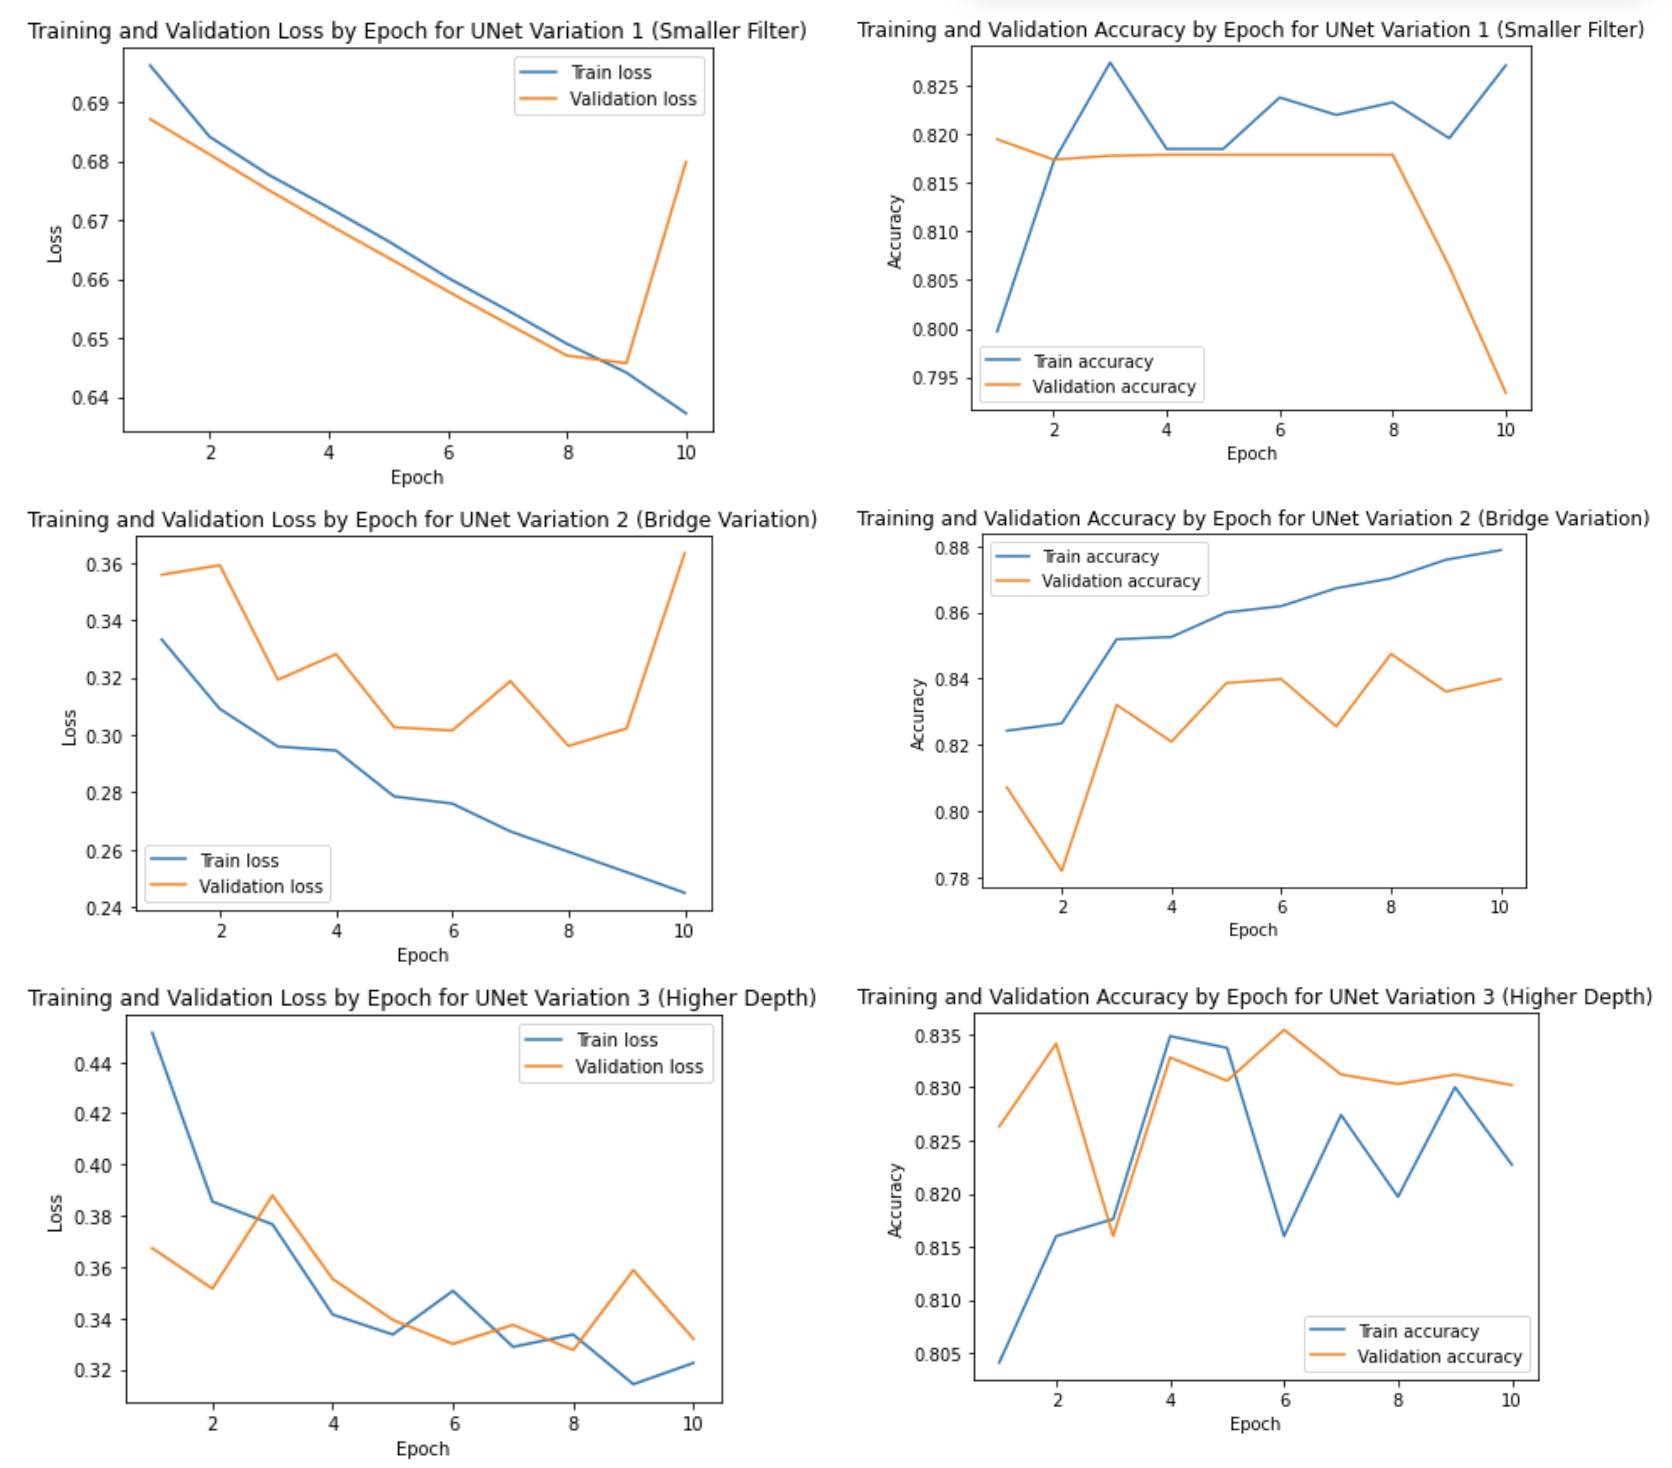


### Prediction Comparison for Models:

#### Baseline

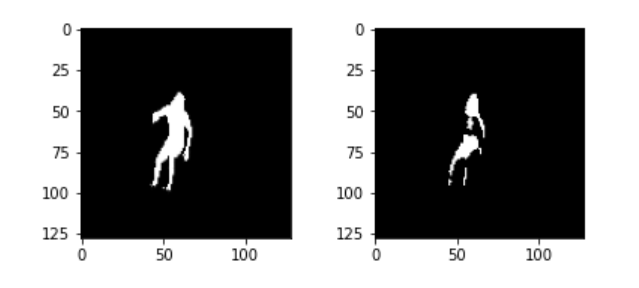



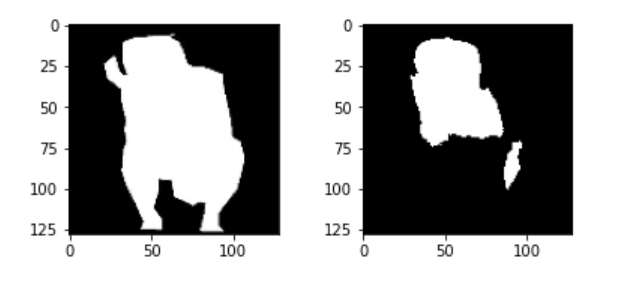

#### Model Variation 1: Output Block and Filter Size Change

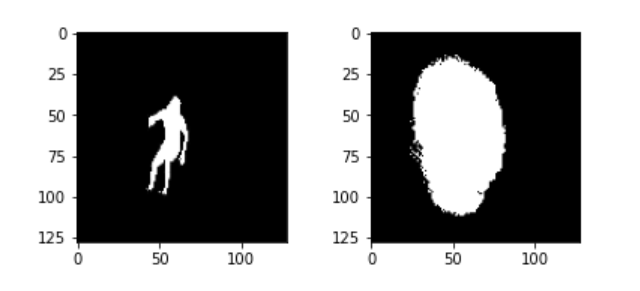

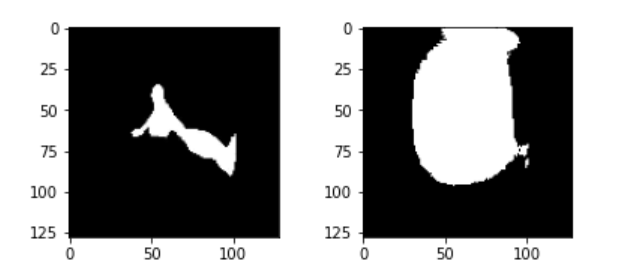

#### Model Variation 2: Bridge Layer Increase and Decoder/Encoder Reduction

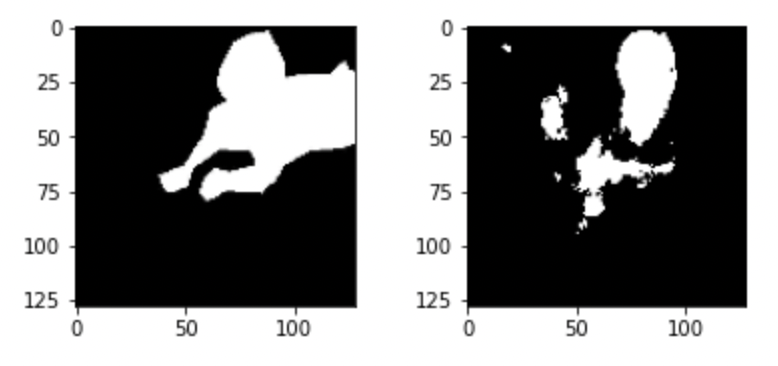

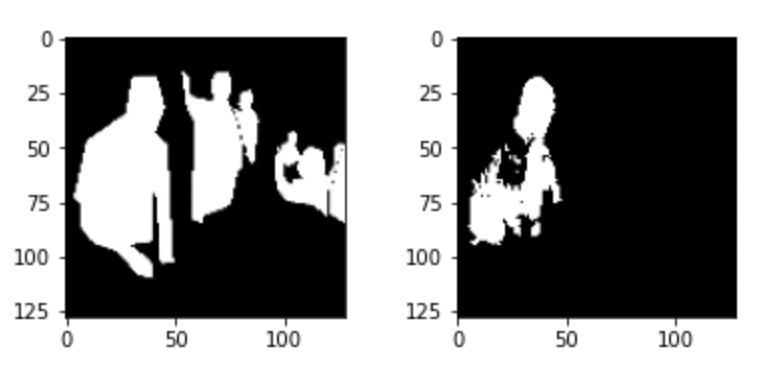

#### Model Variation 3: Model Depth Increase


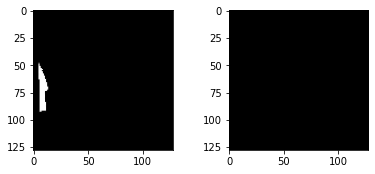

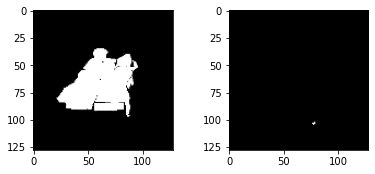

# Discussion

We used the baseline UNet model which has 4 down blocks, each with 2 convolutional, batch norm, activation layers, and a maxpooling layer. It then has a bottleneck block with two convolutional layers and no maxpooling layers. This is followed by 4 up blocks, each with 2 convolutional layers, batch norm layers, and activation layers, and a maxpooling layer. It also joins a skip connection to the corresponding down block and performs up-sampling to increase the spatial dimensions. The skip connections help combine and feed output from previous layers into the next layers and help fuse the features to get more refined features and also help deal with the vanishing gradient problem. This model had the best performance among all the model variations that we tried.

__Output block and Filter Size Change:__
We tried reducing the filter sizes by half and adding an extra layer to the output block while finally putting all the features together and obtaining the encodings. This did not improve the performance of the model. It can be attributed to the fact that larger filter sizes would help increase the receptive field giving us better features. A small filter size, thus decreases the model's receptive field and prevents it from being able to detect the person object as a whole.


__Decoder/Encoder Decrease and Bridge Depth Increase:__
We then tried reducing the encoder/decoder depth and increasing the layers in the bridge, by taking out a layer from the down and up blocks and adding an extra layer to the bottleneck block. We essentially ended up removing 4 convolutional layers and only adding in one more, which overall decreases the depth of the model. This also reduces the number of skip connections we have. This did not improve the performance, and we learned that depth was important for the model architecture. Additionally, a reduction in skip connections might also be a cause for a dip in performance.


__Depth Increase:__
We tried increasing the depth of the model by adding an extra layer to the down blocks and up blocks and using 3 down blocks and up blocks instead of 4. But this gave us a worse performance which we think is because of the reduction in the number of skip connections.

The visualizations in the results section also show how the general idea of the human segmentation is captured by the baseline model, while the other variations are not able to do a better job at segmenting the images. 

### Limitations

Given that the COCO dataset was extremely large, we decided to use a subset of it, mainly focusing on the 'PERSON' class. This is because a big section of the dataset consists of observations from this class. We did try out a pre-trained model that made use of the entire dataset to perform a sanity check, but given more time, we would like to trian our models on the entire dataset as well. Additionally, we faced some issues with the GPU and thus had to limit the complexity of our model.

### Ethics & Privacy
One potential ethical complication comes from the success of the model. Machines being better able to identify objects in a picture enables better spying on people. This model could easily be applied to an oculus, or oculus data, which could determine what products are in someone’s house, allowing meta to directly link a consumer to which products they buy. They will then sell this information to advertisers. With more information garnered from customers, it is easier to identify consumers in the real world, and know more about them. This is a big privacy issue.

Another potential ethical issue comes from the failure of the model. This model is necessary for many life threatening tasks, such as a self-driving vehicle and surgery. If the model incorrectly identifies something in either of these tasks, it could lead to death. A car not identifying a stop sign could run a stop and cause a car crash. Surgery AR goggles not identifying a nerve could lead to a surgeon cutting the nerve and leaving the patient paralyzed. Additionally, the data is often skewed toward certain races, which makes it better at identifying disproportionately represented races and things in their cultures.

To help address these and other potential ethical issues, we will use the tool “deon.” This has a checklist of many common issues in machine learning, and we can also modify the checklist to better suit our needs.

### Conclusion

__UPDATE__ Reiterate your main point and in just a few sentences tell us how your results support it. Mention how this work would fit in the background/context of other work in this field if you can. Suggest directions for future work if you want to.

# Footnotes

<a name="lin"></a>1.[^](#lin): Tsung-Yi Lin, Michael Maire, et. al 2014 Microsoft COCO: Common Objects in Context. https://arxiv.org/abs/1405.0312<br> 
<a name="mwiti"></a>2.[^](#mwiti): Derrick Mwiti, Katherine (Yi) Li (5 April 2022) Image Segmentation in 2022: Architectures, Losses, Datasets, and Frameworks https://neptune.ai/blog/image-segmentation<br>
<a name="yuan"></a>3.[^](#yuan): Yuhui Yuan, Xiaokang Chen, et. al 2020 Segmentation Transformer: Object-Contextual Representations for Semantic Segmentation https://arxiv.org/pdf/1909.11065v6.pdf<br>
<a name="law"></a>4.[^](#law): Hei Law, Jia Deng, et. al 2019. CornerNet: Detecting Objects as Paired Keypoints https://arxiv.org/pdf/1808.01244.pdf <br>
<a name="zhou"></a>5.[^](#zhou): Xingyi Zhou, Dequan Wang, et. al 2019. Objects as Points https://arxiv.org/pdf/1904.07850.pdf <br>
<a name="coconote"></a>6.[^](#coco): COCO Dataset. https://cocodataset.org/#overview <br>
<a name="solawetznote"></a>7.[^](#solawetz): Solawetz, Jacob. (18 Oct 2020). An Introduction to the COCO Dataset. *Roboflow*. https://blog.roboflow.com/coco-dataset/ <br>
<a name="gandhinote"></a>8.[^](#gandhi): Gandhi, R. (2018, July 9). R-CNN, fast R-CNN, Faster R-CNN, YOLO - object detection algorithms. Medium. Retrieved April 24, 2022, from https://towardsdatascience.com/r-cnn-fast-r-cnn-faster-r-cnn-yolo-object-detection-algorithms-36d53571365e <br>
<a name="harshit"></a>9.[^](#zhou): Singhal, H. (2019, July 17). UNet-on-COCO.
https://github.com/H-arshit/UNET-On-COCO#unet-on-coco <br>
